In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 124950 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/visual.csv", encoding="utf-8-sig")

In [22]:
df

,BRDCST_DE,CHNNEL_NM,ADVRTS_MATR_NM,ADVRTS_BEGIN_TIME,ADVRTS_TIME,UNIT_ACCTO_ADVRTS_ODR,UNIT_ACCTO_ADVRTS_CO,INDUTY_SCLAS_NM,AREA_NM,ANALS_TRGET_NM,TVGRP_CO,frequency,TYPE_STR,CLASS,AD_POSITION_LABEL
0,2023-01-01,KBS2,맥도날드 (애니메이션/RMHC하우스/행운버거),125138,30,3,3,패스트푸드점,서울,가구,1,0,프로,A,후
1,2023-01-01,KBS2,맥도날드 (애니메이션/RMHC하우스/행운버거),125138,30,3,3,패스트푸드점,서울,개인,0,0,프로,A,후
2,2023-01-01,KBS2,맥도날드 (애니메이션/RMHC하우스/행운버거),125138,30,3,3,패스트푸드점,경기·인천,가구,1,0,프로,A,후
3,2023-01-01,KBS2,맥도날드 (애니메이션/RMHC하우스/행운버거),125138,30,3,3,패스트푸드점,경기·인천,개인,0,0,프로,A,후
4,2023-01-01,KBS2,맥도날드 (애니메이션/RMHC하우스/행운버거),125138,30,3,3,패스트푸드점,경기·인천,유료매체가입가구,1,0,프로,A,후
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133607,2023-12-26,SBS,진천청주왕족발보쌈 (백년가게의맛/건강하고맛있게),73313,20,2,3,대중음식점,충청북도,유료매체가입개인,3,1,토막,B,중간
1133608,2023-12-26,SBS,맥도날드 (NCT도영/행운버거를구매해주신/감사합니다),73530,30,1,5,패스트푸드점,제주도,가구,0,1,토막,B,중간
1133609,2023-12-26,SBS,맥도날드 (NCT도영/행운버거를구매해주신/감사합니다),73530,30,1,5,패스트푸드점,제주도,개인,0,1,토막,B,중간
1133610,2023-12-26,SBS,맥도날드 (NCT도영/행운버거를구매해주신/감사합니다),73530,30,1,5,패스트푸드점,제주도,유료매체가입가구,0,1,토막,B,중간


In [5]:
df["PAID_YN"] = df["ANALS_TRGET_NM"].apply(lambda x: "Paid" if "유료" in str(x) else "Non-Paid")

In [6]:
# 필요한 컬럼만 선택
df = df[['AREA_NM', 'ANALS_TRGET_NM', 'TVGRP_CO', 'PAID_YN']].dropna()

In [25]:
# 데이터 타입 확인
df['TVGRP_CO'] = pd.to_numeric(df['TVGRP_CO'], errors='coerce')  # 숫자형 변환

In [26]:
df.head()

,AREA_NM,ANALS_TRGET_NM,TVGRP_CO,PAID_YN
0,서울,가구,1,Non-Paid
1,서울,개인,0,Non-Paid
2,경기·인천,가구,1,Non-Paid
3,경기·인천,개인,0,Non-Paid
4,경기·인천,유료매체가입가구,1,Paid


In [27]:
df.dtypes

,0
AREA_NM,object
ANALS_TRGET_NM,object
TVGRP_CO,int64
PAID_YN,object


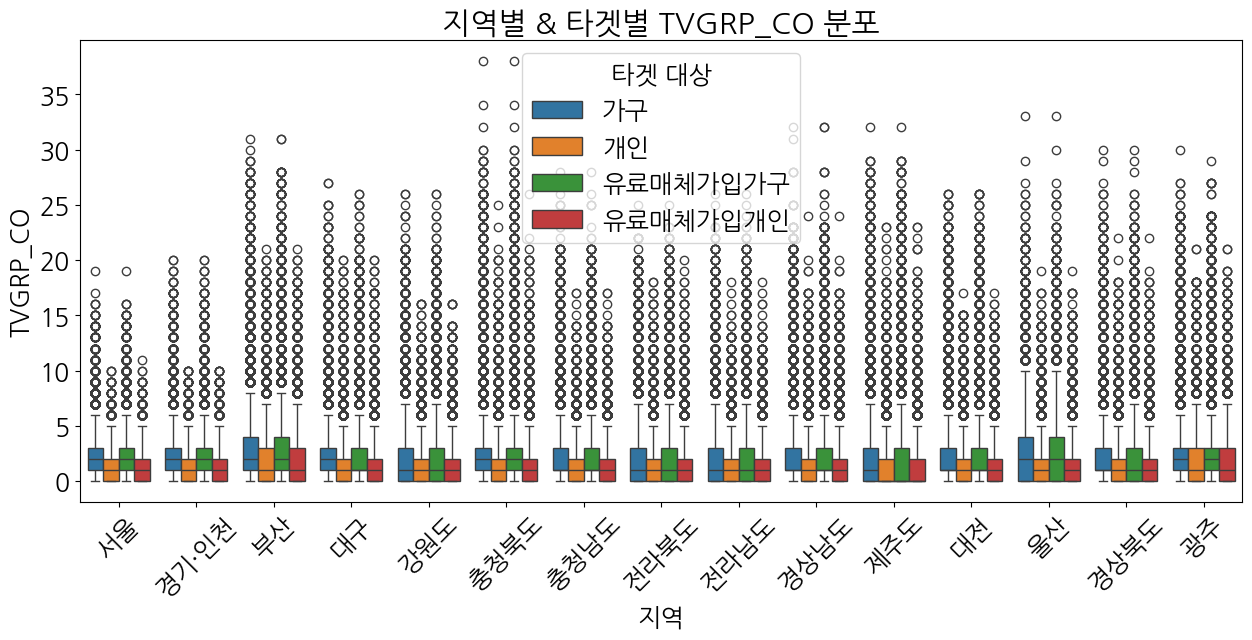

In [28]:
# ----------------------------- 🎯 지역 & 타겟별 TVGRP_CO 분석 ----------------------------- #
plt.figure(figsize=(15, 6))
sns.boxplot(x='AREA_NM', y='TVGRP_CO', hue='ANALS_TRGET_NM', data=df)
plt.xticks(rotation=45)
plt.title("지역별 & 타겟별 TVGRP_CO 분포")
plt.xlabel("지역")
plt.ylabel("TVGRP_CO")
plt.legend(title="타겟 대상")
plt.show()

In [29]:
# ANOVA 검정 (지역 & 타겟별 차이 분석)
anova_p_value = stats.f_oneway(*[df[df['ANALS_TRGET_NM'] == target]['TVGRP_CO'] for target in df['ANALS_TRGET_NM'].unique()])
print(f"ANOVA 검정 결과: p-value = {anova_p_value.pvalue:.5f}")

ANOVA 검정 결과: p-value = 0.00000


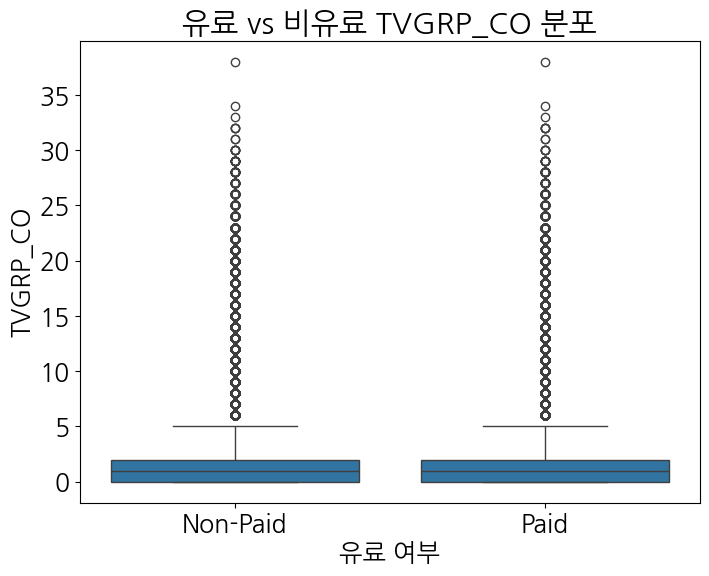

In [30]:
# ----------------------------- 🎯 유료/비유료 TVGRP_CO 비교 ----------------------------- #
plt.figure(figsize=(8, 6))
sns.boxplot(x='PAID_YN', y='TVGRP_CO', data=df)
plt.title("유료 vs 비유료 TVGRP_CO 분포")
plt.xlabel("유료 여부")
plt.ylabel("TVGRP_CO")
plt.show()

In [31]:
# T-test (유료 vs 비유료 차이 검정)
paid_grp = df[df['PAID_YN'] == 'Paid']['TVGRP_CO']
non_paid_grp = df[df['PAID_YN'] == 'Non-Paid']['TVGRP_CO']

t_test_p_value = stats.ttest_ind(paid_grp, non_paid_grp, equal_var=False)
print(f"T-test 결과: p-value = {t_test_p_value.pvalue:.5f}")

T-test 결과: p-value = 0.00000


In [7]:
df.head()

,AREA_NM,ANALS_TRGET_NM,TVGRP_CO,PAID_YN
0,서울,가구,1,Non-Paid
1,서울,개인,0,Non-Paid
2,경기·인천,가구,1,Non-Paid
3,경기·인천,개인,0,Non-Paid
4,경기·인천,유료매체가입가구,1,Paid


In [9]:

# '유료매체가입가구'와 '일반 가구' 데이터 필터링
group1 = df[df['PAID_YN'] == 'Paid']['TVGRP_CO']
group2 = df[df['PAID_YN'] == 'Non-Paid']['TVGRP_CO']

# 맨-휘트니 U 검정 수행
stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# 결과 출력
print(f"Mann-Whitney U Statistic: {stat}")
print(f"p-value: {p_value}")

# 유의 수준(alpha) 0.05 기준으로 해석
if p_value < 0.05:
    print("유료매체가입가구와 일반 가구 간 광고 효과 차이가 유의미함.")
else:
    print("유료매체가입가구와 일반 가구 간 광고 효과 차이가 유의미하지 않음.")


Mann-Whitney U Statistic: 158679577334.5
p-value: 6.165281600911406e-31
유료매체가입가구와 일반 가구 간 광고 효과 차이가 유의미함.
